In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# import dataset
from sklearn.datasets import load_breast_cancer

In [2]:
# load dataset
data=load_breast_cancer()

In [3]:
# standardization of dataset
sc = StandardScaler()
scaled_data = sc.fit_transform(data.data)

In [4]:
df = pd.DataFrame(scaled_data, columns=data.feature_names)
df['Category']=data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Category
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0


In [5]:
X=df.drop('Category',axis=1)
Y=df['Category']

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [7]:
dec_tree_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [8]:
dec_tree_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
Y_pred_gini=dec_tree_gini.predict(X_test)

In [10]:
conf_mat=confusion_matrix(Y_test,Y_pred_gini)
accuracy=accuracy_score(Y_test,Y_pred_gini)
report=classification_report(Y_test,Y_pred_gini)

print("Confusion Matrix:\n",conf_mat)

print("\nAccuracy:",accuracy)

print("\n Report:\n",report)

Confusion Matrix:
 [[37  5]
 [ 4 68]]

Accuracy: 0.9210526315789473

 Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        42
           1       0.93      0.94      0.94        72

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [11]:
dec_tree_ig=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [12]:
dec_tree_ig.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [13]:
Y_pred_ig=dec_tree_ig.predict(X_test)

In [14]:
conf_mat=confusion_matrix(Y_test,Y_pred_ig)
accuracy=accuracy_score(Y_test,Y_pred_ig)
report=classification_report(Y_test,Y_pred_ig)

print("Confusion Matrix:\n",conf_mat)

print("\nAccuracy:",accuracy)

print("\n Report:\n",report)

Confusion Matrix:
 [[37  5]
 [ 5 67]]

Accuracy: 0.9122807017543859

 Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.93      0.93      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



[Text(0.5, 0.875, 'x[22] <= -0.063\nentropy = 0.953\nsamples = 455\nvalue = [170, 285]'),
 Text(0.25, 0.625, 'x[27] <= 0.311\nentropy = 0.176\nsamples = 266\nvalue = [7, 259]'),
 Text(0.125, 0.375, 'x[10] <= 0.859\nentropy = 0.037\nsamples = 252\nvalue = [1, 251]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 249\nvalue = [0, 249]'),
 Text(0.1875, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.375, 0.375, 'x[21] <= 0.043\nentropy = 0.985\nsamples = 14\nvalue = [6, 8]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4375, 0.125, 'entropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(0.75, 0.625, 'x[27] <= 0.55\nentropy = 0.578\nsamples = 189\nvalue = [163, 26]'),
 Text(0.625, 0.375, 'x[21] <= -0.939\nentropy = 0.998\nsamples = 53\nvalue = [28, 25]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.6875, 0.125, 'entropy = 0.881\nsamples = 40\nvalue = [28, 12]'),
 Text(0.875, 0.375, 'x[1] <= -0.918\nentropy = 

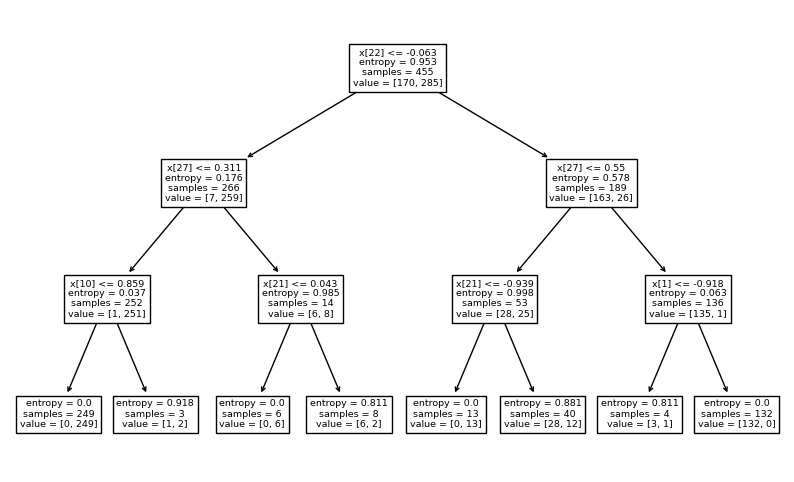

In [15]:
plt.figure(figsize=(10,6))
tree.plot_tree(dec_tree_ig.fit(X_train,Y_train))

[Text(0.5, 0.875, 'x[22] <= -0.036\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(0.25, 0.625, 'x[27] <= 0.674\ngini = 0.064\nsamples = 271\nvalue = [9, 262]'),
 Text(0.125, 0.375, 'x[27] <= 0.311\ngini = 0.03\nsamples = 265\nvalue = [4, 261]'),
 Text(0.0625, 0.125, 'gini = 0.008\nsamples = 254\nvalue = [1, 253]'),
 Text(0.1875, 0.125, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.375, 0.375, 'x[21] <= -0.145\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.625, 'x[21] <= -0.819\ngini = 0.219\nsamples = 184\nvalue = [161, 23]'),
 Text(0.625, 0.375, 'x[23] <= 0.147\ngini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.6875, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.875, 0.375, 'x[7] <= -0.001\ngini = 0.103\nsamples = 165\nvalue = [156, 9]'),


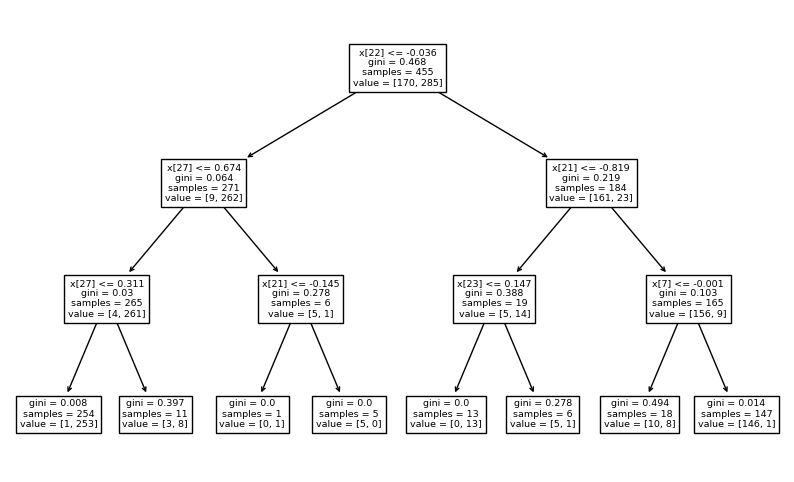

In [16]:
plt.figure(figsize=(10,6))
tree.plot_tree(dec_tree_gini.fit(X_train,Y_train))